# XYZ Example

In this tutorial we load an XYZ trajectory.

In [2]:
%matplotlib inline
import numpy as np
import exatomic
import bz2, os
if not hasattr(bz2, "open"):
    bz2.open = bz2.BZ2File

- The extra stuff, bz2, is due to the fact that the data is compressed
- Typically, the syntax is as simple as **exatomic.XYZ("myfile.xyz")**

In [3]:
path = os.path.abspath(os.path.join(exatomic.__file__, "../static/H2O.traj.xyz.bz2"))
with bz2.open(path) as f:
    xyz = exatomic.XYZ(f.read().decode("utf-8"))

- The xyz object is an **Editor**
- **Editors** are representations of text files on disk
- These objects facilitate parsing of output data

In [4]:
xyz.head()

     0: 192
     1: frame: 500
     2: O   10.28508956   8.14460938   13.52695208
     3: O   11.35249854   11.35175769   9.48063013
     4: O   12.13309196   8.16159606   4.40491549
     5: O   13.08212337   0.82074230   8.49852496
     6: O   11.61851733   6.25548970   6.55479391
     7: O   9.43623192   4.76428163   2.98272836
     8: O   13.09122527 -0.60466753   1.95264245
     9: O   12.99597287   5.17908995   0.11265448 

In [5]:
xyz.tail()

227941: H   6.04990327   3.24458779   2.04330157
227942: H   3.57922006 -0.35624345 -2.44128726
227943: H -3.88712344   4.80109139   4.02831396
227944: H -1.25442119   5.64846732   2.59449545
227945: H   5.15913457   2.78450812   10.49242229
227946: H   3.73656644   16.44876653   12.33820213
227947: H   1.84052508   5.15303842   9.75342242
227948: H -0.71357806   4.52787046   1.57043161
227949: H   3.75299748   1.08580857   6.38535047
 

- We expect 1175 **frames** (remember that **frames** are states - in this case denoting steps in time)

In [6]:
len(xyz) // (192 + 2)     # 192 atoms per frame plus 2 for the xyz file syntax

1175

- Parsing is performed automatically if the attribute of interest is requested

In [7]:
xyz.atom.head()

,symbol,x,y,z,frame
atom,,,,,
0,O,19.4359,15.39100,25.56210,0
1,O,21.4530,21.45160,17.91570,0
2,O,22.9281,15.42310,8.32404,0
3,O,24.7215,1.55097,16.05980,0
4,O,21.9557,11.82110,12.38670,0


In [8]:
xyz.frame.head()

,atom_count
frame,
0,192
1,192
2,192
3,192
4,192


- Always check that data was correctly constructed

In [9]:
xyz.frame.tail()

,atom_count
frame,
1170,192
1171,192
1172,192
1173,192
1174,192


- This happens to be a periodic calculations so lets quickly add that information
- This is important for periodic two-body calculations

In [10]:
for i, r in enumerate(("x", "y", "z")):
    for j, q in enumerate(("i", "j", "k")):
        if i == j:
            xyz.frame[r+q] = 12.4/0.529
        else:
            xyz.frame[r+q] = 0.0
    xyz.frame["o"+r] = 0.0
xyz.frame['periodic'] = True

In [11]:
xyz.atom.tail()

,symbol,x,y,z,frame
atom,,,,,
225595,H,9.74930,5.26193,19.82770,1174
225596,H,7.06105,31.08350,23.31570,1174
225597,H,3.47807,9.73778,18.43120,1174
225598,H,-1.34846,8.55639,2.96767,1174
225599,H,7.09210,2.05187,12.06650,1174


In [12]:
np.all(xyz.atom.groupby("frame").size() == 192)

True

- The **XYZ** object has a convenience method for creating a **Universe**

In [13]:
uni = xyz.to_universe()
len(uni)

1175

- Note that **data is not duplicated**!

In [14]:
uni.atom is xyz.atom

True

In [15]:
uni.frame is xyz.frame

True

- We can ask exatomic to compute distances (bonds)
- **WARNING** this operation might take a minute!

In [21]:
%time uni.compute_atom_two()

CPU times: user 46 s, sys: 594 ms, total: 46.6 s
Wall time: 18.5 s


In [27]:
uni.atom_two.shape

(3564092, 5)

In [26]:
uni.atom_two[uni.atom_two['bond'] == True].shape

(1919401, 5)

- This means that changes to **xyz.atom** will appear in **uni.atom**
- The **network** method helps keep track of what data objects exist

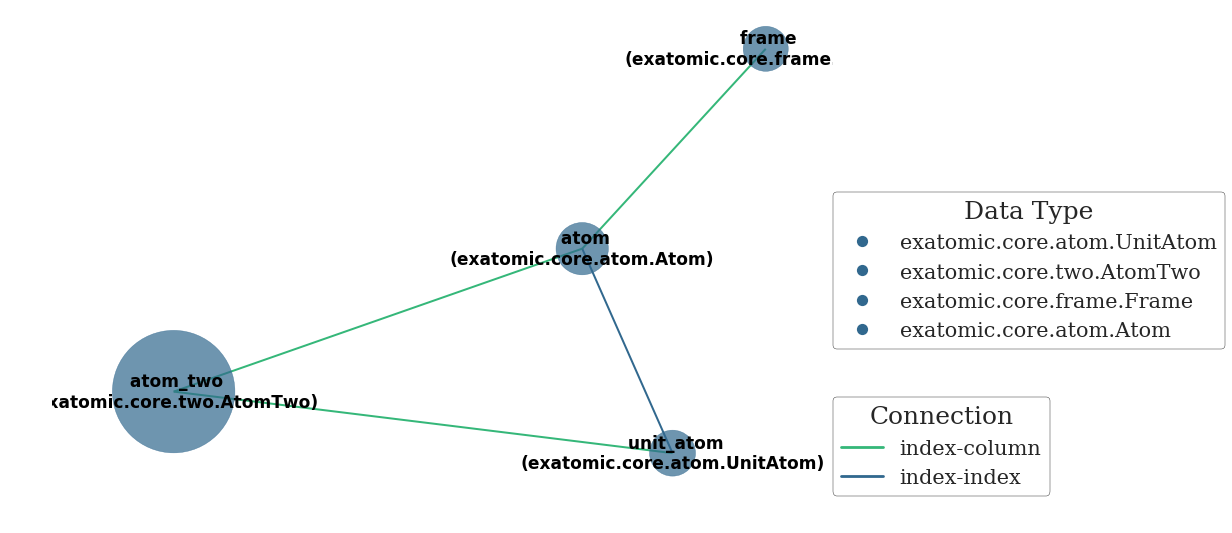

In [28]:
uni.network()

- Since **atom_two** scales quadractically its size is large compared to the other datatables
- The **unit_atom** table is needed for computing periodic two-body data

In [29]:
uni.atom_two.dtypes

atom0         category
atom1         category
dr             float64
projection       int64
bond              bool
dtype: object

- Of course we can also visualize the animation of the trajectory!

In [30]:
exatomic.UniverseWidget(uni)

A Jupyter Widget